<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Medical_Images_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.2 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/archive"

dicom_dir  full_archive.npz  overview.csv  tiff_images


In [ ]:
dicom_file = pydicom.dcmread("/content/drive/My Drive/archive/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [ ]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [ ]:
dicom_file[0x0028, 0x0010]

(0028,0010) Rows                                US: 512

In [ ]:
dicom_file.Rows

512

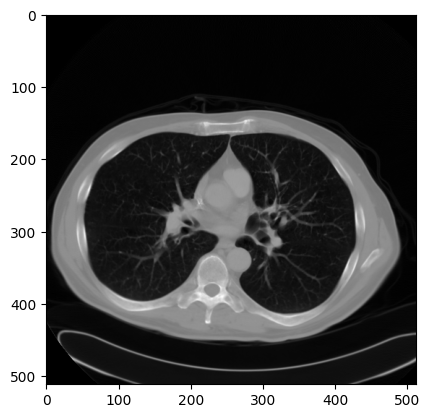

In [ ]:
ct = dicom_file.pixel_array #contains the image
plt.figure()
plt.imshow(ct, cmap = 'gray') #make it grey scale to look like a typical ct scan
plt.show()

In [ ]:
path_to_head_mri = Path("/content/drive/My Drive/archive/dicom_dir") #access to all files in this directory

In [ ]:
all_files = list(path_to_head_mri.glob("*"))

In [ ]:
len(all_files)

100

In [ ]:
all_files

[PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0023_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0018_AGE_0074_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0012_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0002_AGE_0074_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0020_AGE_0066_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0005_AGE_0048_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm'),
 PosixPath('/content/drive/My Drive/archive/dicom_dir/ID_0026_AGE_0070_CONTRAST_

In [ ]:
mri_data = []

for path in all_files:
  mri_data.append(pydicom.dcmread(path))

In [ ]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

-247.5
-220
-203
53.5
-427


In [ ]:
mri_data_ordered = sorted(mri_data, key = lambda x: x.SliceLocation)

In [ ]:
full_volume = []
for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

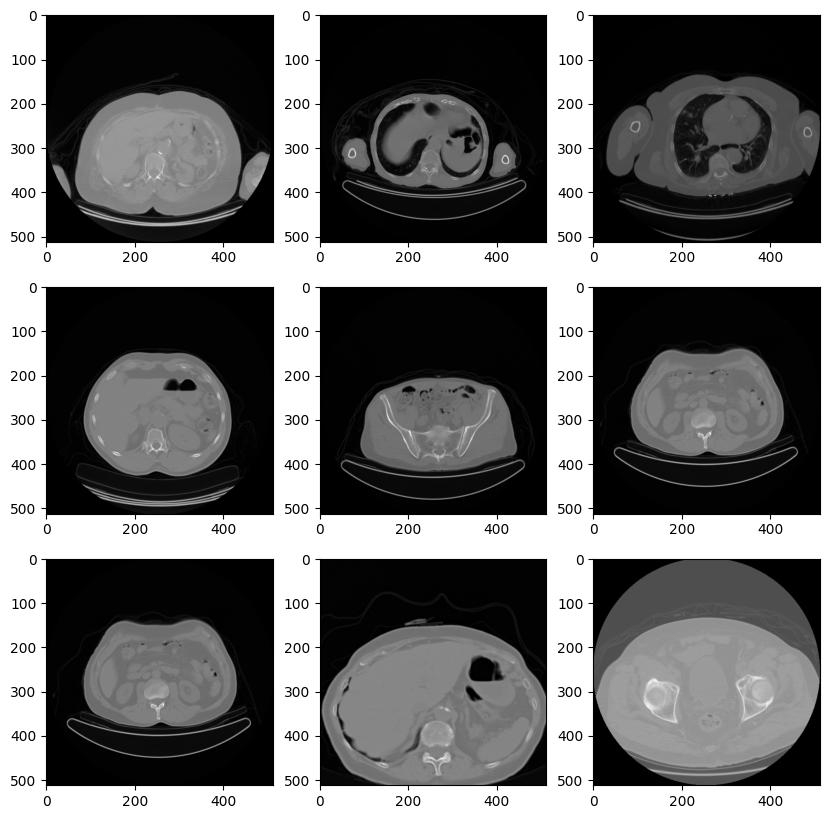

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

counter = 0
for i in range(3):
  for j in range(3):
  #axis[i].imshow(full_volume[i], cmap = 'gray')
    axis[i][j].imshow(full_volume[counter], cmap = 'gray')
    counter += 1